<h1 align='center'> 영상처리 프로그래밍 실습 1</h1>

<h6 align='right'> 2025. 3. 12.</h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   이선재 &nbsp;&nbsp;          학번:   20227123 &nbsp;&nbsp;         학과(전공):  빅데이터학과
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 18일 (화) 오후 10:00까지 최종본 SmartLEAD제출


# 문제 1. Image file 이해하기

### Image file 읽기
주: 이 노트북 파일이 있는 디렉토리에 goldhill.bmp 파일이 있어야 한다.

In [ ]:
# 디지털신호와 아날로그신호의 차이
# 연속성의 차이
# 디지털 신호는 아날로그 신호를 토막토막낸 다음 양자화 하여
# 연속된것 처럼 보여준다

In [ ]:
# ADAC
# 토막난것을 이어 붙여준다 what??
# 소리는 ADAC를 추가로 붙여주고
# 눈은 멍청? 하기 때문에 알아서 해줌

In [ ]:
# goldhill의 사양은 ? 
# 786,486 바이트
# 하지만 512*512*3 은 786432
# 왜 차이가 나요??
# 그건 추가 헤더 정보(대략 54)이 들어있기 떄문
512*512*3 + 54

786432

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir('./')

['goldhill.bmp', 'IPP-3-2-image-IO', 'IPP_2025-01-lab-20227123-이선재.ipynb']

In [2]:
img_file = 'goldhill.bmp'
img = iio.imread(img_file)

In [6]:
type(img)

numpy.ndarray

In [ ]:
img.shape, img.dtype
# uint8 : Unsigned Integer 8bit

((512, 512, 3), dtype('uint8'))

array([10, 10, 10], dtype=uint8)

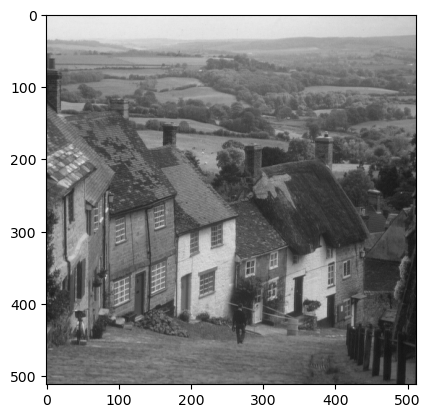

In [ ]:
plt.imshow(img)

In [ ]:
# 브로드드캐스팅 - 각 성분에 추가로 연산한 것
img[0,0] + 50

array([60, 60, 60], dtype=uint8)

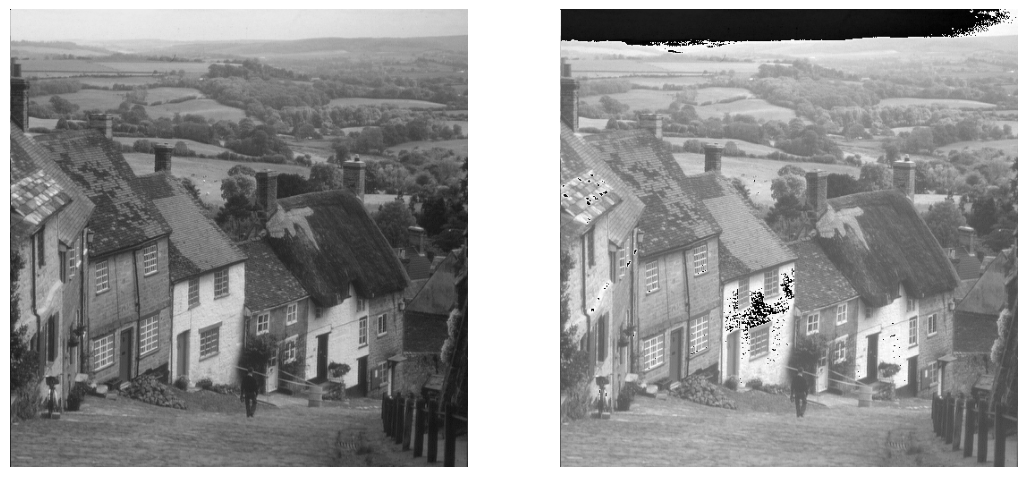

In [ ]:
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off') # 가로축과 세로축에 있는 숫자를 사라지게 만듬
plt.subplot(1,2,2)
plt.imshow(img+50) # 오버플로우
plt.axis('off')
plt.show()

# 255에서 50을 추가로 더하면 8bit의 한계 255를 넘어서기 때문에
# 오버플로우 발생 -> 0부터 다시 시작하기 때문에 밝아 지는게 아닌 어두워진다.

In [ ]:
print(img[0,:2,:])
print(img[0,:2,:] + 50)

# 230에서 50을 추가 하면
# 오버플로우 255를 넘어가
# 24가 되어 어두워진다.

[[ 10  10  10]
 [230 230 230]]
[[60 60 60]
 [24 24 24]]


In [30]:
import numpy as np

In [ ]:
img_mod = img.astype('float') # 타입 변경 uint8 -> float
img_mod[0,0] , img[0,0]

(array([10., 10., 10.]), array([10, 10, 10], dtype=uint8))

In [ ]:

# 클릭 핑 : 최소와 최대를 두고 싶은 때 사용하는 함수

# 그러므로 얻을 수 있는 이점은 -
# 그냥 더하기 할 때는 오버플로우로 밝아지기는 커녕 반대로 어두워졌는데
# 이런식으로 float로 변경하여 255 오버플로우를 없애고 계산
# 계산이 끝나면 clip로 0~255로 제한하여 
# 사진에 쓸 수 있게 uint8로 타입변경을 하면
# 안정적으로 밝게 만들 수 가 있음
(img.astype('float') + 50).clip(0,255).astype(np.uint8)

array([[[ 60,  60,  60],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [250, 250, 250],
        [249, 249, 249]],

       [[252, 252, 252],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [251, 251, 251],
        [249, 249, 249],
        [250, 250, 250]],

       [[248, 248, 248],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [249, 249, 249]],

       ...,

       [[ 79,  79,  79],
        [153, 153, 153],
        [159, 159, 159],
        ...,
        [134, 134, 134],
        [122, 122, 122],
        [ 92,  92,  92]],

       [[ 78,  78,  78],
        [153, 153, 153],
        [166, 166, 166],
        ...,
        [138, 138, 138],
        [117, 117, 117],
        [ 89,  89,  89]],

       [[ 81,  81,  81],
        [164, 164, 164],
        [165, 165, 165],
        ...,
        [134, 134, 134],
        [123, 123, 123],
        [ 91,  91,  91]]

In [26]:
# 결과
img_mod = (img.astype('float')+50).clip(0,255).astype(np.uint8)
plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off') # 가로축과 세로축에 있는 숫자를 사라지게 만듬
plt.subplot(1,2,2)
plt.imshow(img_mod) # 오버플로우
plt.axis('off')
plt.show()

In [ ]:
# 사용중이 던것을 qt로 변환, 독립창을 쓰도록 만듬
%matplotlib qt

In [43]:
# OOP 객체지향프로그래밍

def update_add(val):
    global img_org, ax_mod
    img_ = np.clip(img_org + val, 0, 255)
    img_ = img_.astype(np.uint8)

def image_read(image_dir, image_file):
    img_path = os.path.join(image_dir, image_file)
    img = iio.imread(img_path).astype(np.uint8)
    img_org = np.array(img).astype(np.uint8)
    return img_org

ttt = 0
max_blas = 200

img_dir = './'
img_file = 'goldhill.bmp'

img_org = image_read(img_dir, img_file)


In [34]:
from matplotlib.widgets import Slider

In [45]:
# from matplotlib.widgets import Slider
max_bias = 200

plt.rc('font', size=20)
fig = plt.figure(figsize=[11.5 ,5.5], num='Change pixel values of an image')
ax_org_image = fig.add_subplot(1,2,1)
ax_mod_image = fig.add_subplot(1,2,2)
ax_org = ax_org_image.imshow(img_org, cmap='gray', vmin=0, vmax=255)
ax_mod = ax_mod_image.imshow(img_org, cmap='gray', vmin=0, vmax=255)
ax_org_image.axis('off')
ax_mod_image.axis('off')

# fig.canvas.mpl_connect('motion_notify_event', on_move)

ax_slider = fig.add_axes([0.3, 0.05, 0.4, 0.03], facecolor='w')

slider = Slider(ax_slider, 'bias', -max_bias, max_bias, valinit=0, valstep=1, color='k')

slider.on_changed(update_add)

plt.show()

In [47]:
a = np.arange(24).reshape([2,4,3])
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]]])